### Import data

In [78]:
include("importData.jl")
include("Hill.jl")
include("plot.jl")

# import G1, G2, and population data
conc_, pop_l, g2_l, g1_l, g2_0_l, g1_0_l = setup_data("lapatinib");
conc, pop_g, g2_g, g1_g, g2_0_g, g1_0_g = setup_data("gemcitabine");
conc_l = append!([0.1], conc_[2:end]);
conc_g = append!([0.1], conc[2:end]);

┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = get_data(::String, ::String) at importData.jl:29
└ @ Main /home/farnazm/DrugResponseModel.jl/src/importData.jl:29
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = get_data(::String, ::String) at importData.jl:37
└ @ Main /home/farnazm/DrugResponseModel.jl/src/importData.jl:37


### Hill model, residual functions and optimization
Lapatinib & gemcitabine

In [15]:
#  [EC50, b_steepness, alpha_min, alpha_max, beta_min, beta_max, tau1_mean, tau1_max, tau2_min, tau2_max, ec50_gamma1, gamma1_max, ec50_gamma2, gamma2_max]
# Lapatinib
ec50lowL = 50.0
ec50highL = 500.0
ec50guessL = 100.0
guessL = [ec50guessL, 1.0, 0.00682578, 0.00958013, 0.00503788, 0.0933964, 15.0, 15.0, 20.0, 20.94827, ec50guessL, 0.00294624, ec50guessL, 0.0422821]

# Gemcitabine
ec50lowg = 10.0
ec50highg = 80.0
ec50guessg = 40.0
guessg = [ec50guessg, 1.0, 0.00682578, 0.00958013, 0.00503788, 0.0933964, 20.0, 20.0, 15.0, 15.94827, ec50guessg, 0.00294624, ec50guessg, 0.0422821]

# max num of steps
num_steps=3000;

# best_fit, paramsL = optimize_hill(guessL, conc_l, g1_l, g2_l, g1_0_l, g2_0_l, num_steps, ec50lowL, ec50highL)

In [16]:

best_fitL, paramsL = optimize_hill(guessL, conc_l, g1_l, g2_l, g1_0_l, g2_0_l, num_steps, ec50lowL, ec50highL)
best_fitG, paramsG = optimize_hill(guessg, conc_g, g1_g, g2_g, g1_0_g, g2_0_g, num_steps, ec50lowg, ec50highg)


Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64},RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps
100.05 secs, 635 evals, 515 steps, improv/step: 0.361 (last = 0.3612), fitness=36671.196004490
200.12 secs, 1274 evals, 1154 steps, improv/step: 0.327 (last = 0.2989), fitness=24635.193025059
300.25 secs, 1915 evals, 1795 steps, improv/step: 0.303 (last = 0.2590), fitness=16259.604055278
400.27 secs, 2553 evals, 2433 steps, improv/step: 0.272 (last = 0.1850), fitness=13102.440721405

Optimization stopped after 3001 steps and 489.22 seconds
Termination reason: Max number of steps (3000) reached
Steps per second = 6.13
Function evals per second = 6.38
Improvements/step = 0.26733
Total function evaluations = 3121


Best candidate found: [54.017, 1.01146, 0.00528117, 0.0427359, 0.031591, 0.0281009, 28.4983, 9.56141, 22.5964, 11.7366, 268.493, 0.0109295, 324.732, 0.00561526]

Fitness: 10059.42

(18912.44395632259, [17.43653502899027, 2.918467016785472, 0.03288784849782191, 0.05647536631836228, 0.016462558656260565, 0.027652974225111822, 27.443131327843417, 7.40901562190861, 16.857035609885273, 11.514065361356103, 10.15559339137781, 0.03404536239515985, 46.28912054535287, 0.008047117779668718])

In [18]:
parsL=getDDEparams(paramsL, conc_l)
parsG=getDDEparams(paramsG, conc_g)

6×8 Array{Float64,2}:
  0.0564754     0.0564753    0.0564698   …   0.0369043    0.0330312 
  0.027653      0.0276529    0.0276503       0.0183681    0.0165305 
  7.40902       7.4091       7.41379        24.0317      27.3214    
 11.5141       11.5141      11.5153         15.9472      16.8246    
  4.73755e-8    6.86943e-7   3.92212e-5      0.0326613    0.0340024 
  1.33822e-10   1.94045e-9   1.10915e-7  …   0.00177023   0.00727843

### Plot the data with the new set of parameters for DDE

#### Lapatinib

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = plotIt(::Array{Float64,1}, ::Int64, ::String, ::Bool, ::DataFrame, ::Array{Float64,2}, ::Array{Float64,2}, ::Array{Float64,1}, ::Array{Float64,1}) at plot.jl:29
└ @ Main /home/farnazm/DrugResponseModel.jl/src/plot.jl:29
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = plotIt(::Array{Float64,1}, ::Int64, ::String, ::Symbol, ::DataFrame, ::Array{Float64,2}, ::Array{Float64,2}, ::Array{Float64,1}, ::Array{Float64,1}) at plot.jl:29
└ @ Main /home/farnazm/DrugResponseModel.jl/src/plot.jl:29


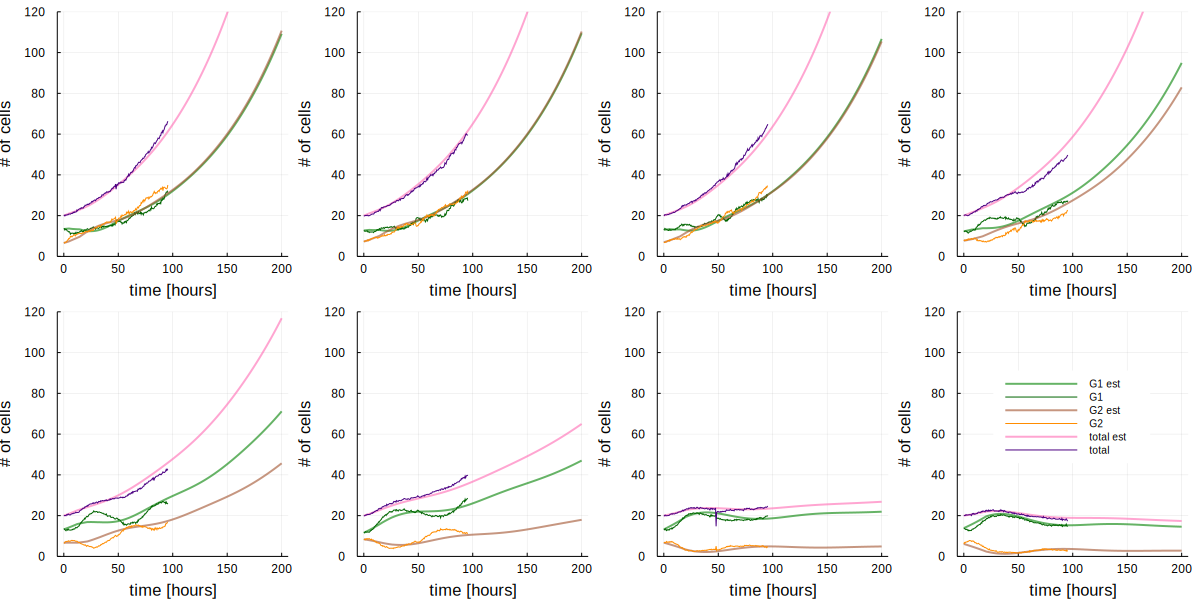

In [5]:
plot_all(parsL, pop_l, g2_l, g1_l, g2_0_l, g1_0_l)

#### Gemcitabine

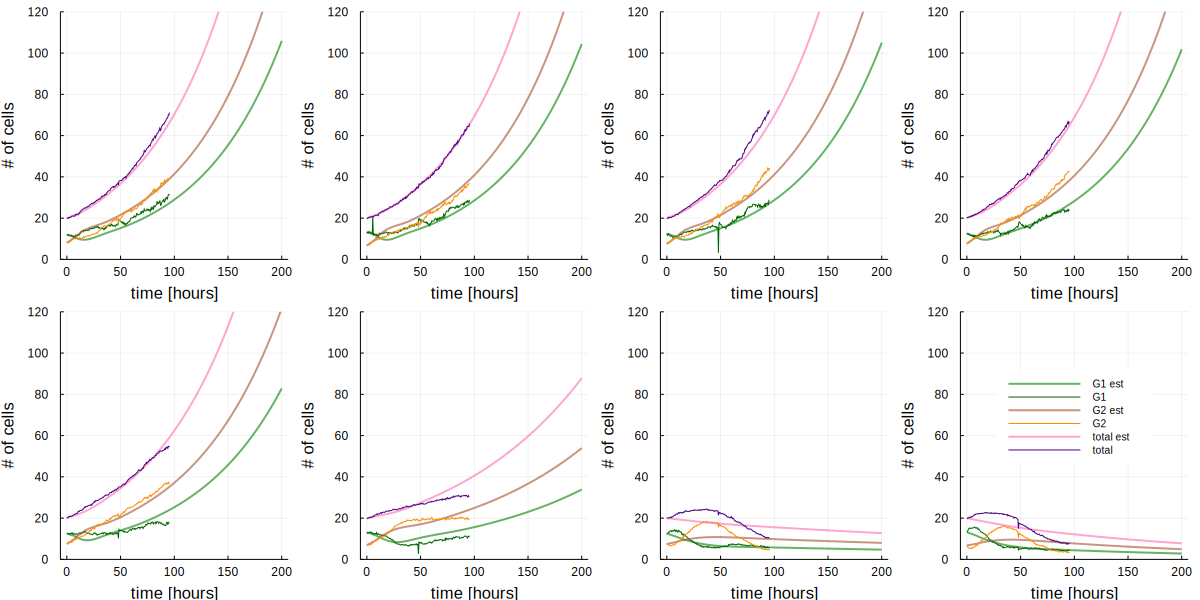

In [6]:
plot_all(parsG, pop_g, g2_g, g1_g, g2_0_g, g1_0_g)

### Plot Hill curve for all of the DDE model parameters

#### Lapatinib

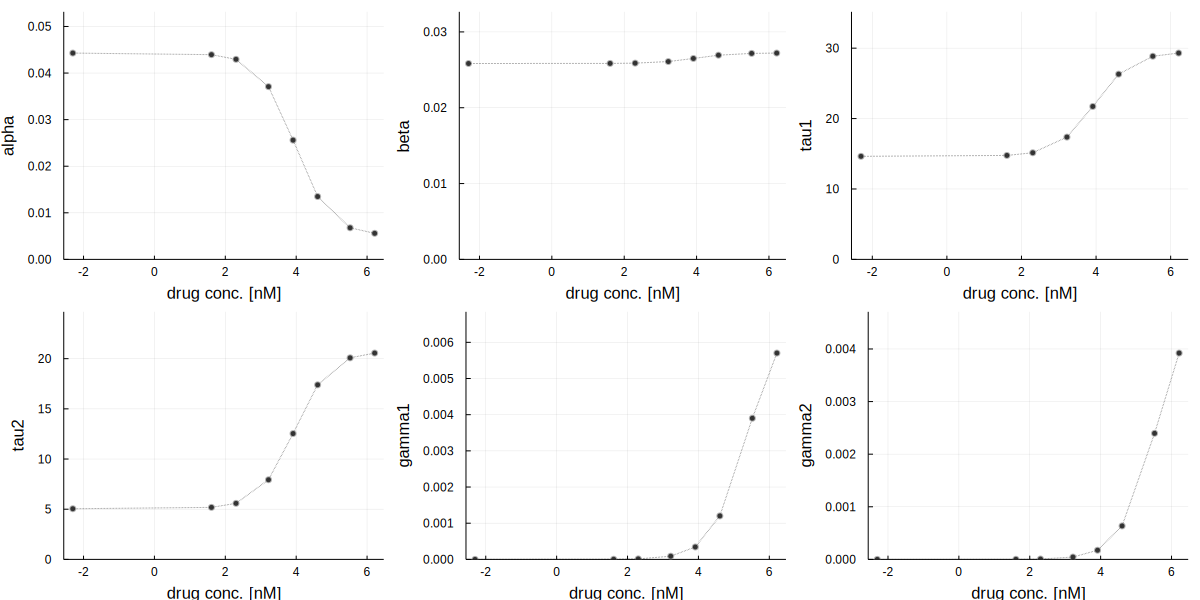

In [7]:
plot_parameters(conc_l, parsL)

#### Gemcitabine

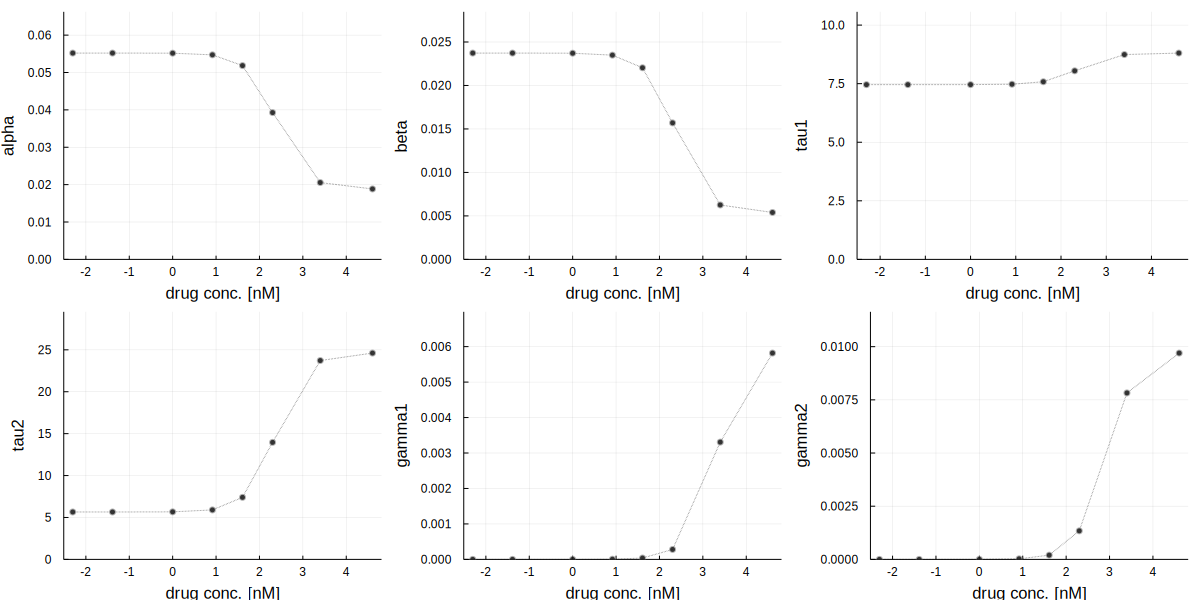

In [8]:
plot_parameters(conc_g, parsG)

#### Bliss combination

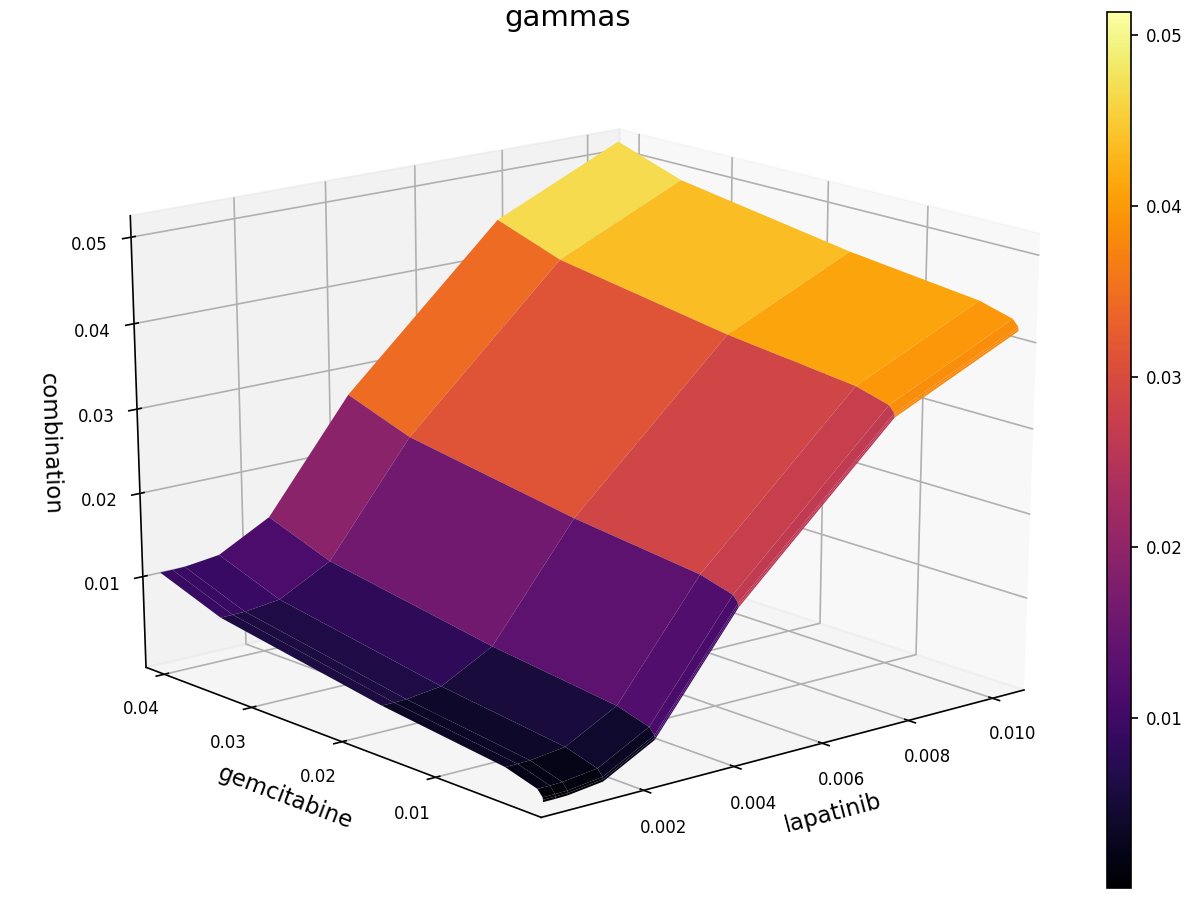

In [79]:
using Plots; pyplot();
function plot3D(parsL, parsG, j::Int, title::String)

    param1 = ParamForBliss(parsL)
    param2 = ParamForBliss(parsG)
    combin = BlissCombination(parsL, parsG)

    plot(param1[j,:],param2[j,:],combin[:,:,j],st=:surface,camera=(-40,20), xlabel="lapatinib", ylabel="gemcitabine", zlabel="combination", title=title)
    plot!(size = (800, 600), dpi=150)
end
plot3D(parsL, parsG, 3, "gammas")